In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [2]:
df = pd.read_csv('data/lake_data.csv')
df

,Unnamed: 0,HYBAS_ID,lake_growth,lake_decline,all,year,region,growth_ratio,decline_ratio,water_balance,water_balance_m3
0,0,4060050470,131593.043137,-75959.117647,3.822362e+07,2001,1,0.003443,0.001987,55633.925490,50.070533
1,7024,4060685650,5658.352941,-3593.000000,3.436465e+07,2001,4,0.000165,0.000105,2065.352941,1.858818
2,7023,4060623190,3181.278431,-711.000000,6.995463e+06,2001,4,0.000455,0.000102,2470.278431,2.223251
3,7022,4060607420,1443.686275,-544.811765,2.884887e+06,2001,4,0.000500,0.000189,898.874510,0.808987
4,7021,4060603790,556.109804,-20.000000,7.101565e+05,2001,4,0.000783,0.000028,536.109804,0.482499
...,...,...,...,...,...,...,...,...,...,...,...
11243,3718,4060052910,16481.811765,-7039.780392,6.560509e+06,2019,15,0.002512,0.001073,9442.031373,8.497828
11244,3717,4060052590,13031.019608,-20440.839216,7.190545e+06,2019,15,0.001812,0.002843,-7409.819608,-6.668838
11245,3716,4060052250,25640.062745,-17944.031373,8.516881e+06,2019,15,0.003010,0.002107,7696.031373,6.926428
11246,3468,4060052510,8063.454902,-3603.000000,7.127448e+06,2019,14,0.001131,0.000506,4460.454902,4.014409


In [3]:
shapefile_path = 'data/hydrobasins_lvl6/hybas_as_lev06_v1c.shp'
shapes = gpd.read_file(shapefile_path)
shapes['LONG'] = shapes.apply(lambda row: row['geometry'].centroid.x, axis=1)
shapes['LAT'] = shapes.apply(lambda row: row['geometry'].centroid.y, axis=1)

In [4]:
df = gpd.GeoDataFrame(df.merge(shapes,))
df.columns

Index(['Unnamed: 0', 'HYBAS_ID', 'lake_growth', 'lake_decline', 'all', 'year',
       'region', 'growth_ratio', 'decline_ratio', 'water_balance',
       'water_balance_m3', 'NEXT_DOWN', 'NEXT_SINK', 'MAIN_BAS', 'DIST_SINK',
       'DIST_MAIN', 'SUB_AREA', 'UP_AREA', 'PFAF_ID', 'ENDO', 'COAST', 'ORDER',
       'SORT', 'geometry', 'LONG', 'LAT'],
      dtype='object')

In [5]:
cols = ['HYBAS_ID', 'lake_growth', 'lake_decline', 'all', 'year',
       'region', 'growth_ratio', 'decline_ratio', 'water_balance',
       'water_balance_m3', 'NEXT_DOWN', 'NEXT_SINK', 'MAIN_BAS', 'DIST_SINK',
       'DIST_MAIN', 'SUB_AREA', 'UP_AREA', 'PFAF_ID', 'ENDO', 'COAST', 'ORDER',
       'SORT', 'geometry', 'LONG', 'LAT']
df[cols]

,HYBAS_ID,lake_growth,lake_decline,all,year,region,growth_ratio,decline_ratio,water_balance,water_balance_m3,...,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry,LONG,LAT
0,4060050470,131593.043137,-75959.117647,3.822362e+07,2001,1,0.003443,0.001987,55633.925490,50.070533,...,29078.1,29078.1,491503,2,0,1,2153,"POLYGON ((89.00000 31.14583, 89.00833 31.14583...",90.002616,32.089184
1,4060050470,131593.043137,-75959.117647,3.822362e+07,2001,14,0.003443,0.001987,55633.925490,50.070533,...,29078.1,29078.1,491503,2,0,1,2153,"POLYGON ((89.00000 31.14583, 89.00833 31.14583...",90.002616,32.089184
2,4060050470,132627.027451,-68044.862745,3.822362e+07,2002,14,0.003470,0.001780,64582.164706,58.123948,...,29078.1,29078.1,491503,2,0,1,2153,"POLYGON ((89.00000 31.14583, 89.00833 31.14583...",90.002616,32.089184
3,4060050470,132627.027451,-68044.862745,3.822362e+07,2002,1,0.003470,0.001780,64582.164706,58.123948,...,29078.1,29078.1,491503,2,0,1,2153,"POLYGON ((89.00000 31.14583, 89.00833 31.14583...",90.002616,32.089184
4,4060050470,152348.231373,-34683.635294,3.822362e+07,2003,14,0.003986,0.000907,117664.596078,105.898136,...,29078.1,29078.1,491503,2,0,1,2153,"POLYGON ((89.00000 31.14583, 89.00833 31.14583...",90.002616,32.089184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11243,4060421180,27756.772549,-3104.756863,1.984714e+07,2015,6,0.001399,0.000156,24652.015686,22.186814,...,13296.2,13296.2,462172,1,0,2,1989,"POLYGON ((70.32083 42.03750, 70.32299 42.03812...",70.532829,41.751033
11244,4060421180,16481.698039,-4356.239216,1.984714e+07,2016,6,0.000830,0.000219,12125.458824,10.912913,...,13296.2,13296.2,462172,1,0,2,1989,"POLYGON ((70.32083 42.03750, 70.32299 42.03812...",70.532829,41.751033
11245,4060421180,2560.450980,-32470.098039,1.984714e+07,2017,6,0.000129,0.001636,-29909.647059,-26.918682,...,13296.2,13296.2,462172,1,0,2,1989,"POLYGON ((70.32083 42.03750, 70.32299 42.03812...",70.532829,41.751033
11246,4060421180,22977.749020,-4818.247059,1.984714e+07,2018,6,0.001158,0.000243,18159.501961,16.343552,...,13296.2,13296.2,462172,1,0,2,1989,"POLYGON ((70.32083 42.03750, 70.32299 42.03812...",70.532829,41.751033


In [6]:
df[cols].to_csv('data_for_modeling.csv')

In [6]:
# df[df.columns[:-1]].to_csv('data_for_modeling.csv')

<Axes: >

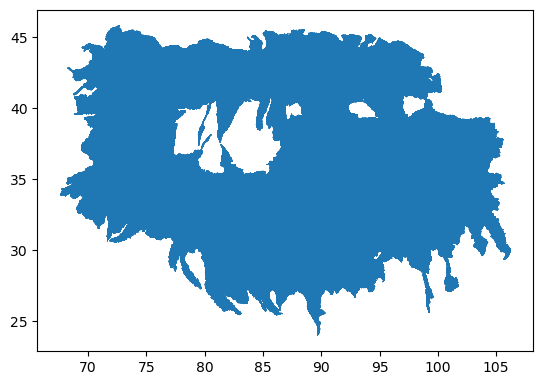

In [5]:
df.plot()

In [6]:
df.columns

Index(['Unnamed: 0', 'HYBAS_ID', 'lake_growth', 'lake_decline', 'all', 'year',
       'region', 'growth_ratio', 'decline_ratio', 'water_balance',
       'water_balance_m3', 'NEXT_DOWN', 'NEXT_SINK', 'MAIN_BAS', 'DIST_SINK',
       'DIST_MAIN', 'SUB_AREA', 'UP_AREA', 'PFAF_ID', 'ENDO', 'COAST', 'ORDER',
       'SORT', 'geometry'],
      dtype='object')

(0.0, 0.1)

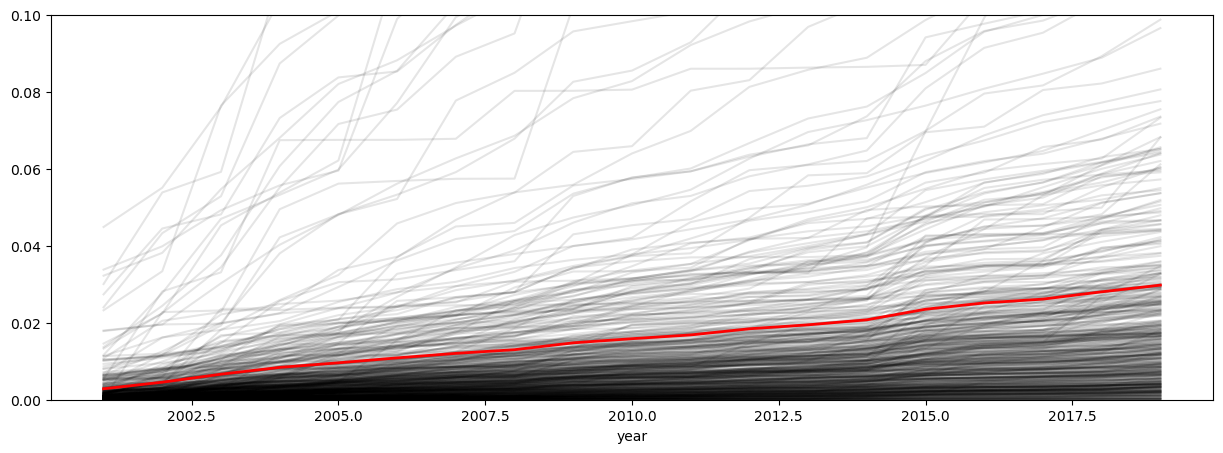

In [7]:
pt = df.pivot_table(index='year', columns='HYBAS_ID', values='growth_ratio')
pt = pt.cumsum()
fig, ax = plt.subplots(figsize=(15, 5))
pt.plot(logy=False, legend=False, alpha=0.1, color='black', ax=ax)
pt.mean(axis=1).plot(ax=ax, color='red', linewidth=2)
ax.set_ylim(0, 0.1)

<Axes: >

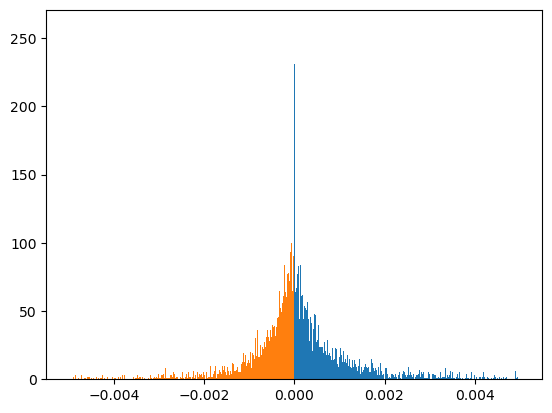

In [8]:
fig, ax = plt.subplots()

df.growth_ratio.hist(bins=np.linspace(0,0.005, 1000), ax=ax, grid=False)
(df.decline_ratio*(-1)).hist(ax=ax, bins=np.linspace(-0.005, 0, 1000), grid=False)

<Axes: >

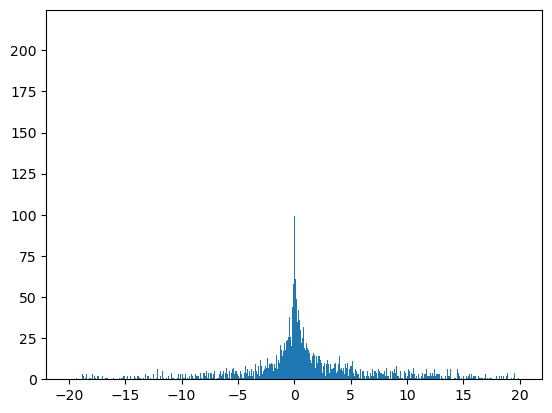

In [13]:
df.water_balance_m3.hist(bins=np.linspace(-20, 20, 2000), grid=False)

In [64]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.6 MB/s eta 0:00:00


/opt/homebrew/anaconda3/envs/tblakes/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 22 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


Text(0.5, 1.0, '2016')

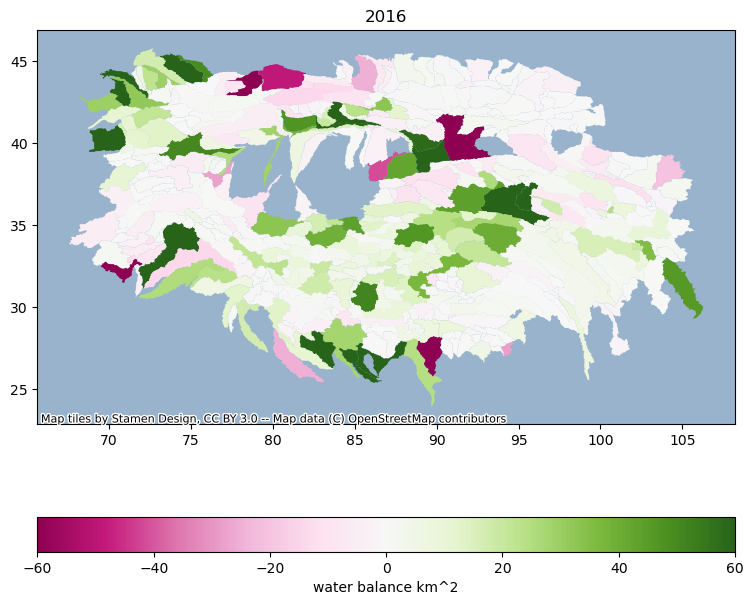

In [102]:
import contextily as cx

year = 2015

fig, ax = plt.subplots(figsize=(9, 8))
cbar = df[df.year==year].plot('water_balance_m3', cmap='PiYG', legend=True, ax=ax, vmin=-60, vmax=60
                             ,legend_kwds={'orientation':'horizontal', 'label':'water balance km^2'})
cx.add_basemap(ax)
ax.set_title(str(year))

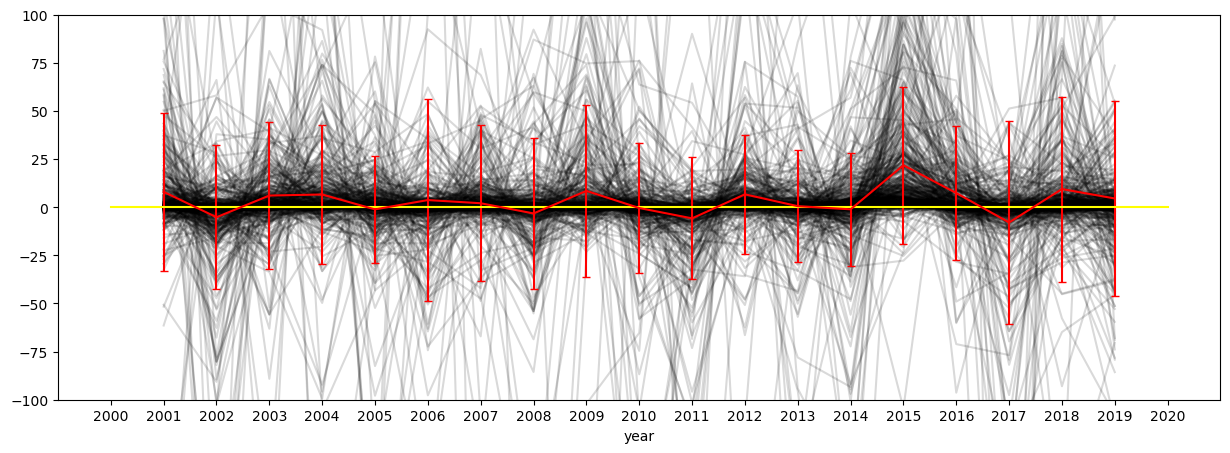

In [132]:
fig, ax = plt.subplots(figsize=(15, 5))

pt = df.pivot_table(index='year', columns='HYBAS_ID', values='water_balance_m3')
pt.plot(legend=False, ax=ax, color='black', alpha=0.15)
ax.set_xticks(np.arange(2000, 2021, 1))
ax.set_ylim(-100, 100)

pt_mu = pt.mean(axis=1)
mt_err = pt.std(axis=1)

ax.errorbar(pt_mu.index, pt_mu.values, mt_err.values, color='red', capsize=3)

ax.plot((2000, 2020), (0, 0), color='yellow')